<a href="https://colab.research.google.com/github/YoussCLD/learn-pytorch/blob/main/premier_r%C3%A9seau_de_neurones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

**Creer une classe qui va hériter du module nn.module**

In [31]:
class Model(nn.Module):
  # imput layes 4 features (descriptors) of the flower
  # ==> hidden layersh1 (n neurons)
  # ==> h2 (n)
  # ==> h3 (n)
  # output layer (3 classes of iris)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [32]:
torch.manual_seed(30)
#instance of model

Model = Model()

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [34]:
from google.colab import files
uploaded = files.upload()


Saving iris.csv to iris (1).csv


In [35]:
path = 'iris.csv'
my_df = pd.read_csv(path)

In [36]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [37]:
# Replace variety with numerical values
variety_mapping = {'Setosa': 0.0, 'Versicolor': 1.0, 'Virginica': 2.0}
my_df['variety'] = my_df['variety'].map(variety_mapping)

my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [38]:
#train test split set X, y

X = my_df.drop('variety', axis = 1)
y = my_df['variety']

In [39]:
#conert these to numpy values
X = X.values
y = y.values

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [42]:
#covert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

#convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [43]:
X_train

tensor([[6.9000, 3.1000, 5.4000, 2.1000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [6.8000, 3.0000, 5.5000, 2.1000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [7.7000, 2.6000, 6.9000, 2.3000],
        [6.9000, 3.1000, 5.1000, 2.3000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [6.4000, 3.1000, 5.5000, 1.8000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [7.2000, 3.0000, 5.8000, 1.6000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [6.4000, 2.8000, 5.6000, 2.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [6.2000, 2.2000, 4.5000, 1.5000],
        [6.4000, 2.7000, 5.3000, 1.9000],
        [5.2000, 2.7000, 3.9000, 1.4000],
        [5.6000, 2.7000, 4.2000, 1.3000],
        [6.1000, 2.8000, 4.7000, 1.2000],
        [5.5000, 2.5000, 4.0000, 1.3000],
        [5.6000, 3.0000, 4.1000, 1.3000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.8000, 2.7000, 4.1000, 1.0000],
        [6.7000, 3.3000, 5.7000, 2.5000],
        [5.8000, 2.6000, 4.0000, 1

In [44]:
# set the criterion of model to mesure the error, how far off the prendictions are from the data

criterion = nn.CrossEntropyLoss()
# choose optimizer
optimizer = torch.optim.Adam(Model.parameters(), lr=0.01)

In [45]:
# train the model

epochs = 100
losses = []

for i in range(epochs):
  y_pred = Model.forward(X_train) #get pred results

  # meusure the loss/error
  loss = criterion(y_pred, y_train)
  #track loses
  losses.append(loss.detach().numpy())

  #print every 10 epochs

  if i % 10 == 0:
    print(f'epoch: {i} and loss: {loss}')

  # do some back propagation : take the error rate of forward propagation and feed it back
  #thru the network to fine tune the weights.

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 and loss: 1.1693464517593384
epoch: 10 and loss: 1.0425224304199219
epoch: 20 and loss: 0.9181671738624573
epoch: 30 and loss: 0.647976815700531
epoch: 40 and loss: 0.4524678587913513
epoch: 50 and loss: 0.3070225119590759
epoch: 60 and loss: 0.17922581732273102
epoch: 70 and loss: 0.10770022124052048
epoch: 80 and loss: 0.075906902551651
epoch: 90 and loss: 0.06145034730434418


Text(0.5, 0, 'Epoch')

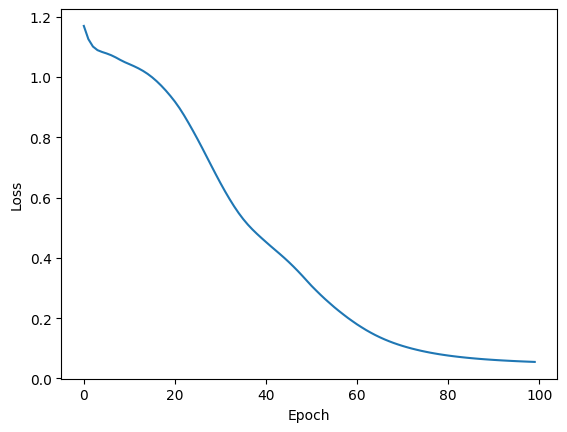

In [46]:
#graph it out
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [47]:
 #evaluate model on test set
 with torch.no_grad(): #turn off back propagation
   y_eval = Model.forward(X_test)
   loss = criterion(y_eval, y_test)

In [48]:
loss

tensor(0.0858)

In [54]:
correct = 0

with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = Model.forward(data)
    probabilities = F.softmax(y_val, dim=0)
    print(f'{i+1}. {str(y_val):38} {y_test[i]} {str(probabilities):38}')


    #correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

1. tensor([ 17.3322,  11.4964, -14.5622]) 0 tensor([9.9709e-01, 2.9126e-03, 1.4034e-14])
2. tensor([ 17.7481,  11.9074, -14.8118]) 0 tensor([9.9710e-01, 2.8984e-03, 7.2142e-15])
3. tensor([ 15.4589,  10.2350, -13.0282]) 0 tensor([9.9464e-01, 5.3577e-03, 4.2256e-13])
4. tensor([-7.1832,  4.6249, 10.0390])    2 tensor([3.3006e-08, 4.4339e-03, 9.9557e-01])
5. tensor([2.5875, 8.0153, 0.4037])       1 tensor([4.3713e-03, 9.9514e-01, 4.9226e-04])
6. tensor([2.0078, 7.4144, 0.7636])       1 tensor([0.0045, 0.9943, 0.0013])      
7. tensor([-4.2486,  6.0439,  7.3626])    2 tensor([7.1508e-06, 2.1104e-01, 7.8896e-01])
8. tensor([-6.4982,  5.7554,  9.8881])    2 tensor([7.5273e-08, 1.5787e-02, 9.8421e-01])
9. tensor([2.2155, 8.4658, 1.0533])       1 tensor([1.9251e-03, 9.9747e-01, 6.0212e-04])
10. tensor([-8.0804,  5.5842, 11.4690])    2 tensor([3.2255e-09, 2.7738e-03, 9.9723e-01])
11. tensor([ 15.3080,  10.0152, -12.8555]) 0 tensor([9.9500e-01, 5.0029e-03, 5.8422e-13])
12. tensor([-7.2991,  5.0

In [52]:
# nouvelles prédictions

new_iris = torch.tensor([5.6, 3.7, 2.2,0.2])

In [53]:
with torch.no_grad():
  print(Model.forward(new_iris))

tensor([ 16.5106,  11.6851, -13.5976])
